In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
!pip install tensorflow

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures as pf
import sklearn.preprocessing

2022-09-04 12:00:40.402273: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-04 12:00:40.402308: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

## The Cell below contains code to allow 100 outputs to be seen to allow me to see the features to discard and the the features to keep.  

In [5]:
pd.set_option("display.max_rows", 100)

## The Cell below contains code to look for the null values in the train dataset and show them as percentages.

In [6]:
train.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

## The Cell below contains code to drop the unusable columns in the train.csv dataset that have too many null values to be useful features.

In [7]:
X = train.drop(["LotFrontage","Alley","FireplaceQu","PoolQC","Fence","MiscFeature","Id"], axis=1)

## The Cell below contains code to view all the unique values in each column. If a column has alot of unique values, they have to be continous data values or it cannot be useful as a feature and also if it has very few unique values then it has to be categorical data values or else it cannot be a useful feature.

In [8]:
X.nunique().sort_values()

Street              2
CentralAir          2
Utilities           2
BsmtHalfBath        3
HalfBath            3
GarageFinish        3
LandSlope           3
PavedDrive          3
Fireplaces          4
KitchenQual         4
KitchenAbvGr        4
ExterQual           4
BsmtQual            4
BsmtCond            4
LandContour         4
LotShape            4
FullBath            4
BsmtExposure        4
BsmtFullBath        4
MasVnrType          4
ExterCond           5
GarageQual          5
Electrical          5
HeatingQC           5
BldgType            5
YrSold              5
LotConfig           5
MSZoning            5
GarageCond          5
GarageCars          5
SaleCondition       6
GarageType          6
Heating             6
BsmtFinType1        6
Foundation          6
RoofStyle           6
BsmtFinType2        6
Functional          7
RoofMatl            8
PoolArea            8
HouseStyle          8
Condition2          8
BedroomAbvGr        8
OverallCond         9
Condition1          9
SaleType  

## The Cell below contains code to sort the columns according to their different data types so that I can get all the categorical data columns into the next cell.

In [9]:
X.dtypes.sort_values()

MSSubClass         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
BsmtFinSF2         int64
BsmtFinSF1         int64
SalePrice          int64
OverallQual        int64
LotArea            int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
GarageYrBlt      float64
GarageFinish      object
Condition2        object
Condition1        object
GarageQual        object


## The Cell below contains code to change all the categorrical columns into integers so that I can work on them to find the P-value and also to use for separation from the rest of the dataset to be left with the continous data for correlation analysis using RegPlot.

In [10]:
X = X.astype({'GarageFinish' : 'category' ,'Condition2' : 'category' ,'Condition1' : 'category',
'GarageQual' : 'category','GarageCond' : 'category','BsmtExposure' : 'category','Neighborhood' : 'category',
'LandSlope' : 'category','LotConfig' : 'category','Utilities' : 'category','LandContour' : 'category',
'LotShape' : 'category','Street' : 'category','MSZoning' : 'category','SaleType' : 'category',
'PavedDrive' : 'category','GarageType' : 'category','HouseStyle' : 'category','Functional' : 'category',
'BsmtFinType1' : 'category','BsmtQual' : 'category','BsmtFinType2' : 'category','Foundation' : 'category',
'ExterCond' : 'category','ExterQual' : 'category','SaleCondition' : 'category','HeatingQC' : 'category',
'CentralAir' : 'category','Electrical' : 'category','MasVnrType' : 'category','Exterior2nd' : 'category',
'Exterior1st' : 'category','RoofMatl' : 'category','RoofStyle' : 'category','KitchenQual' : 'category',
'BsmtCond' : 'category','BldgType' : 'category','Heating' : 'category'})
cat_columns = X.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
X.dtypes.sort_values()

Heating             int8
ExterQual           int8
Foundation          int8
BsmtQual            int8
BsmtCond            int8
BsmtExposure        int8
BsmtFinType1        int8
BsmtFinType2        int8
SaleCondition       int8
HeatingQC           int8
CentralAir          int8
Electrical          int8
PavedDrive          int8
GarageCond          int8
GarageQual          int8
GarageFinish        int8
GarageType          int8
Functional          int8
MasVnrType          int8
Exterior2nd         int8
ExterCond           int8
RoofMatl            int8
MSZoning            int8
SaleType            int8
Street              int8
LotShape            int8
LandContour         int8
Utilities           int8
LotConfig           int8
LandSlope           int8
Neighborhood        int8
Condition1          int8
Exterior1st         int8
KitchenQual         int8
Condition2          int8
RoofStyle           int8
BldgType            int8
HouseStyle          int8
OpenPorchSF        int64
Fireplaces         int64


## The Cell below contains code to perform the correlation analysis on the continous data columns and only use those that pass a certain threshhold seen in the if-else statement in the cell. Only the columns that pass this test will be used in the RegPlot section of the cell and plotted out.

['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
The correlation between  LotArea  and SalesPrice is =  0.2638433538714056
The correlation between  MasVnrArea  and SalesPrice is =  0.4774930470957159
The correlation between  BsmtFinSF1  and SalesPrice is =  0.3864198062421531
The correlation between  BsmtUnfSF  and SalesPrice is =  0.2144791055469689
The correlation between  TotalBsmtSF  and SalesPrice is =  0.6135805515591953
The correlation between  1stFlrSF  and SalesPrice is =  0.6058521846919147
The correlation between  2ndFlrSF  and SalesPrice is =  0.31933380283206775
The correlation between  GrLivArea  and SalesPrice is =  0.7086244776126521
The correlation between  GarageArea  and SalesPrice is =  0.6234314389183618
The correlation between  WoodDeckSF  and SalesPrice is =  0.32441344

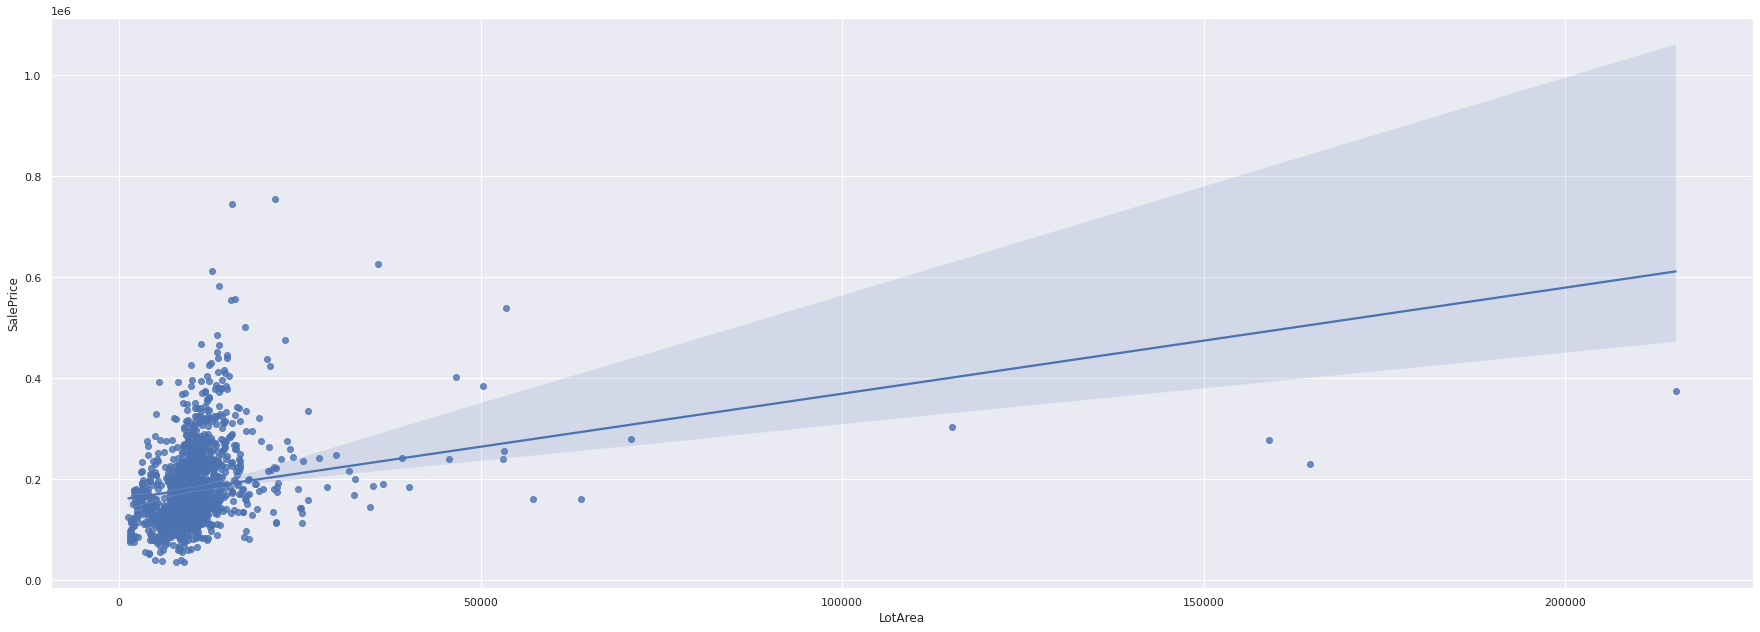

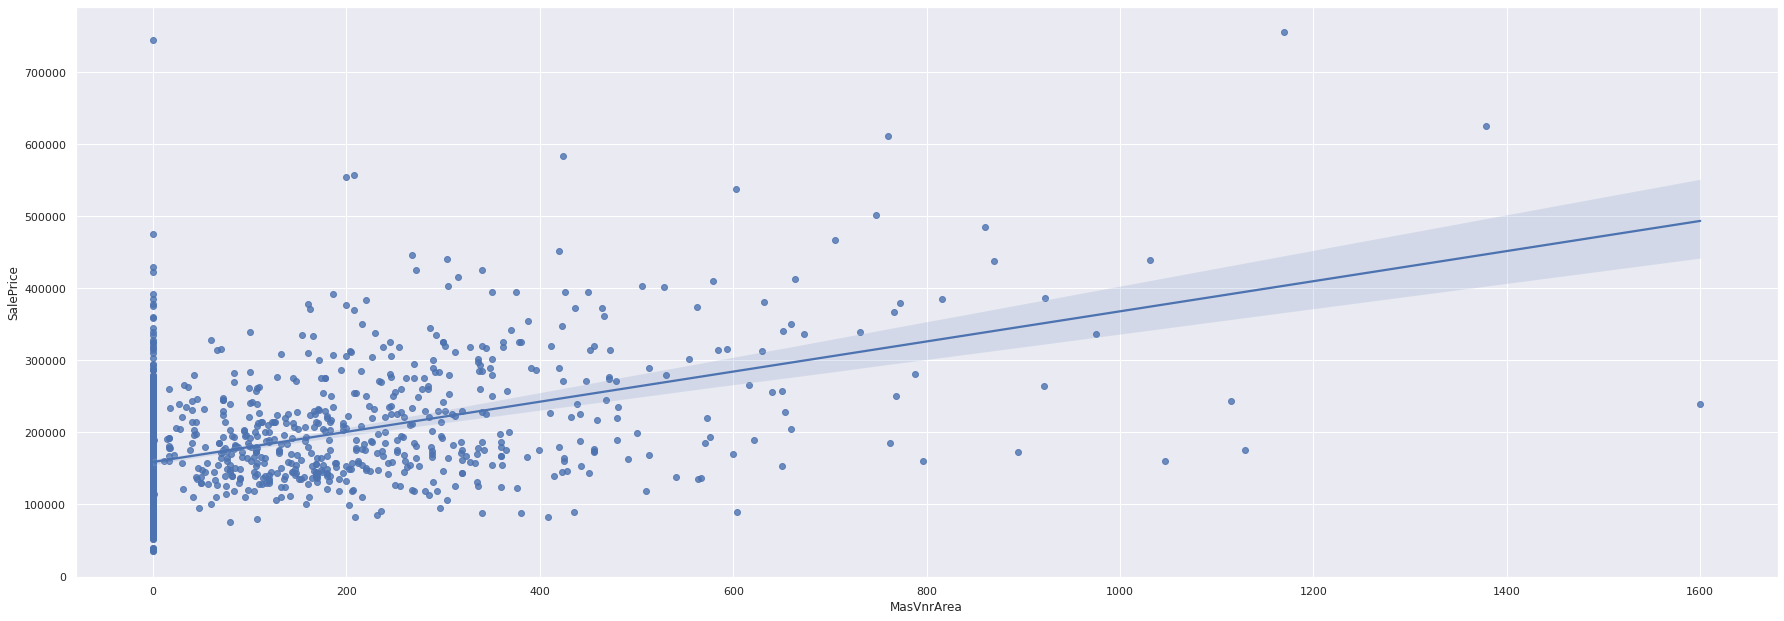

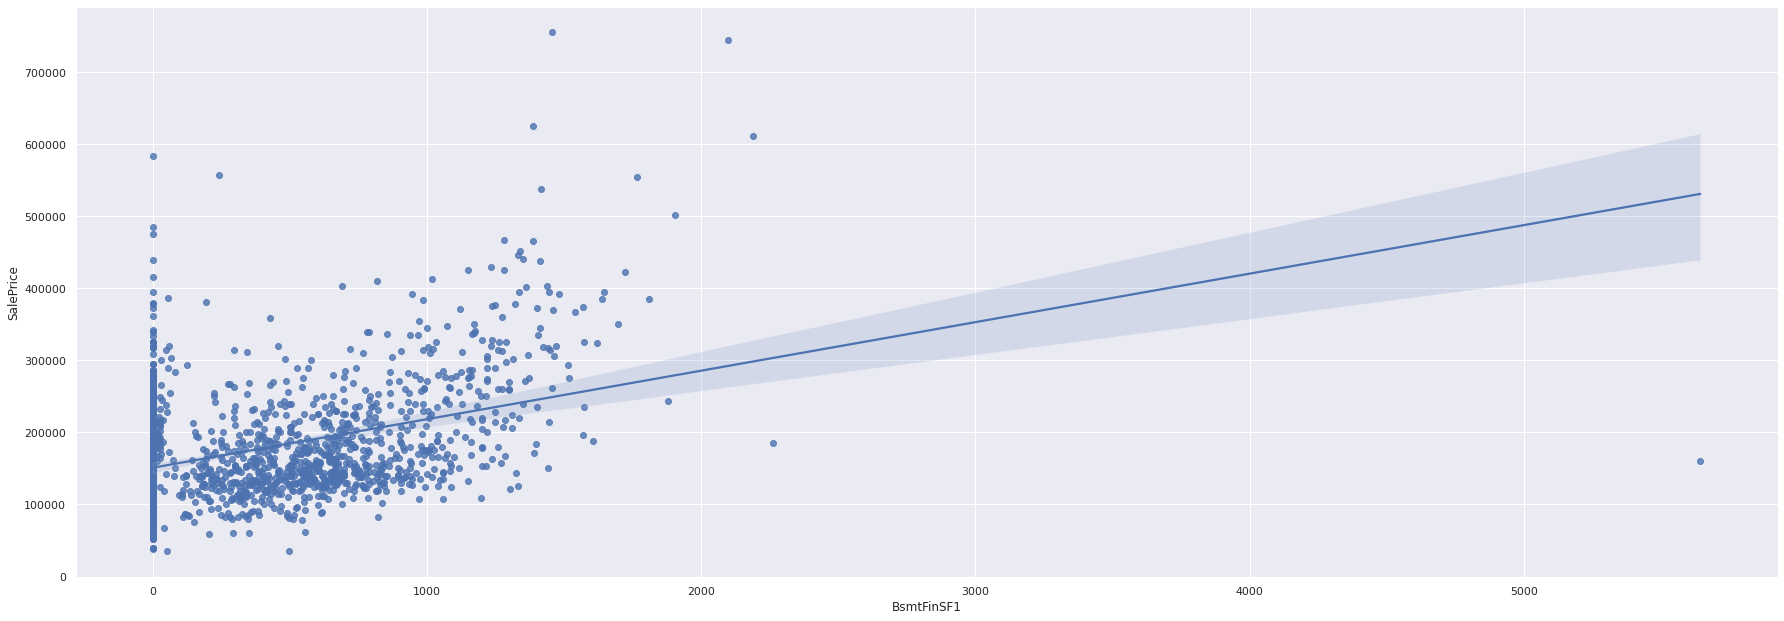

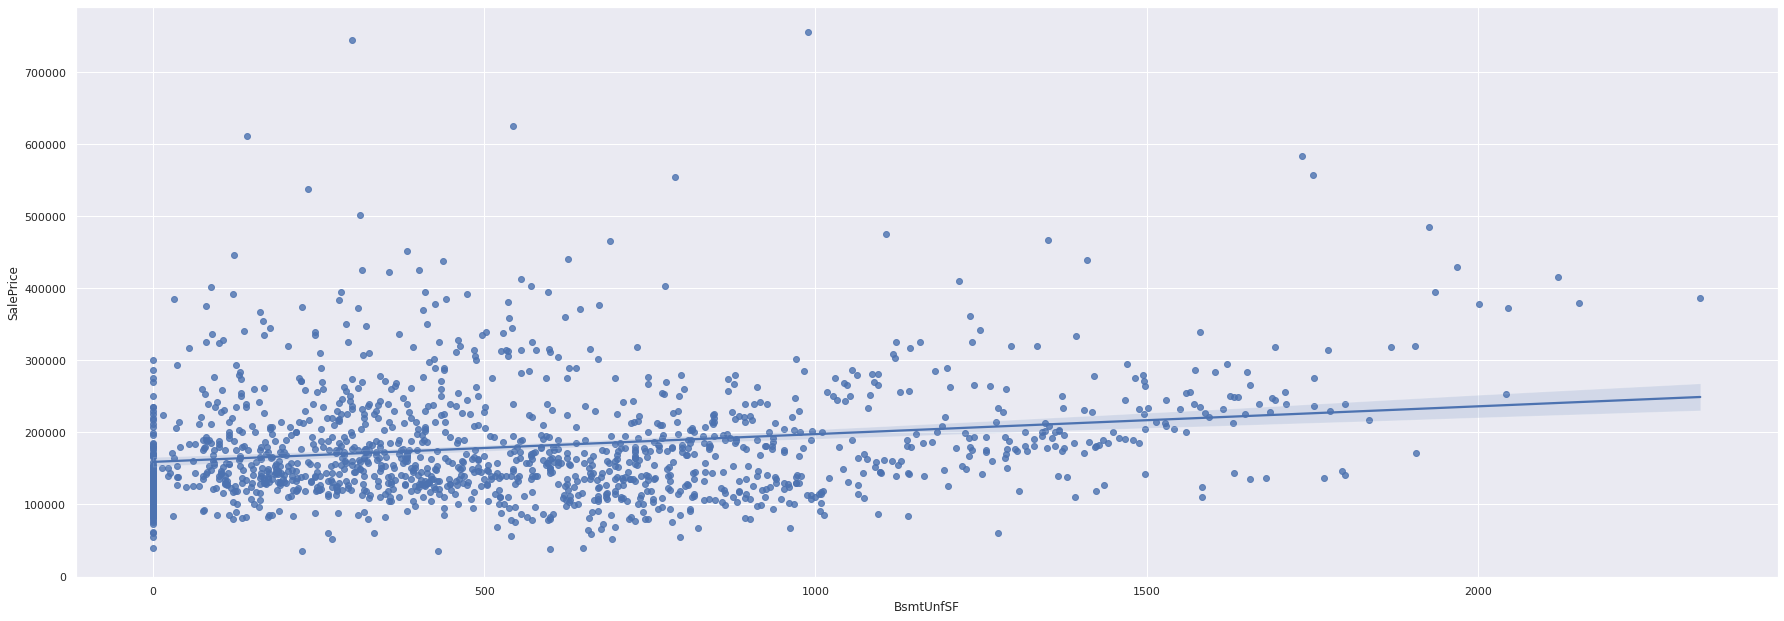

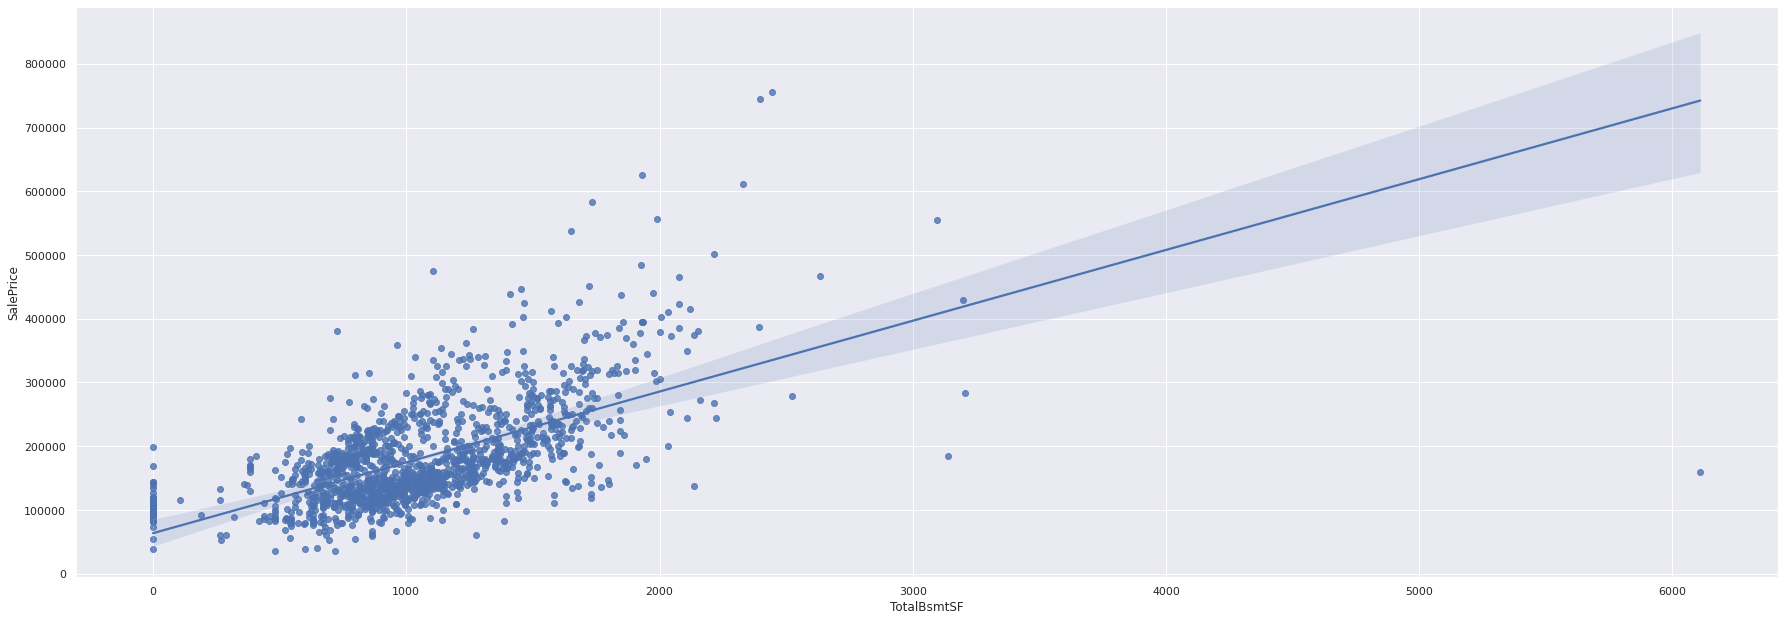

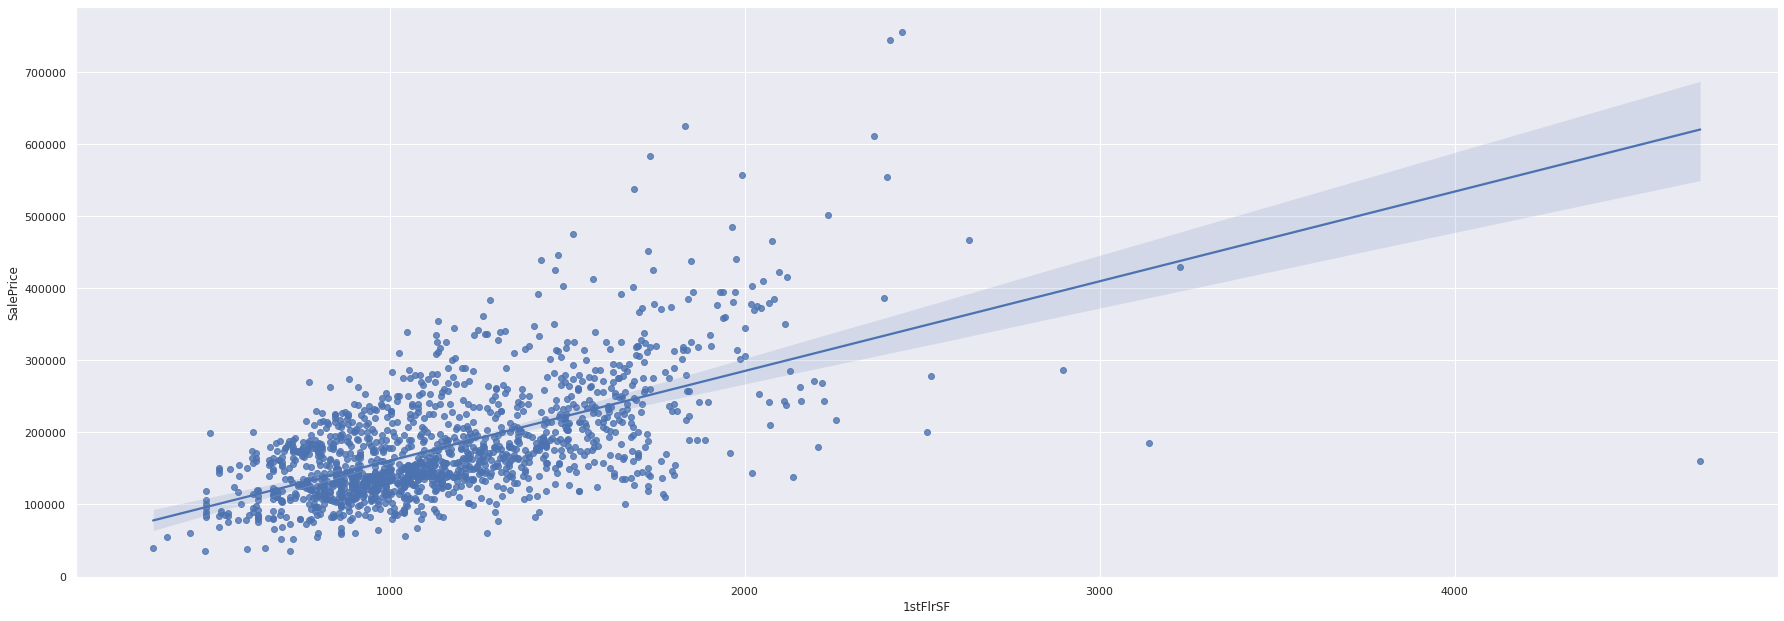

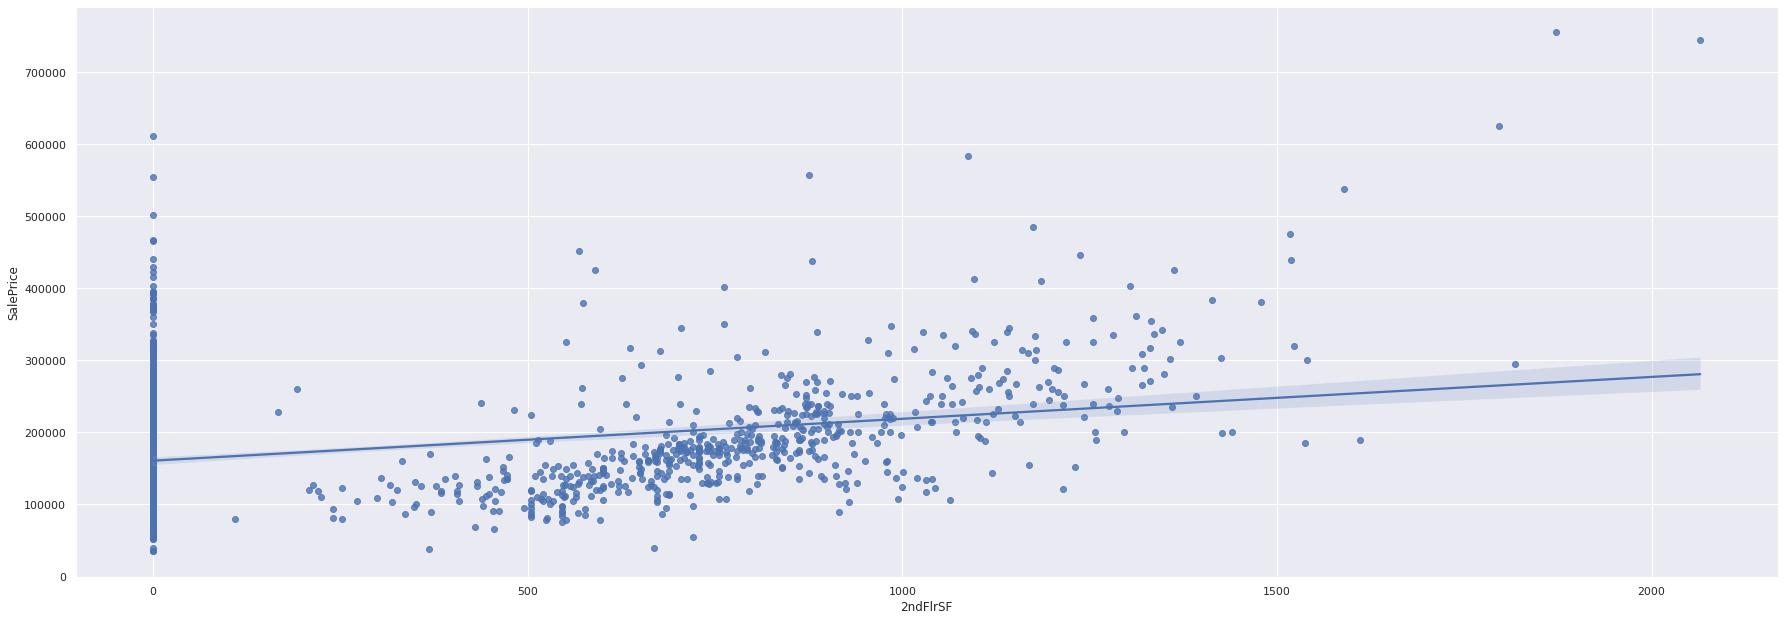

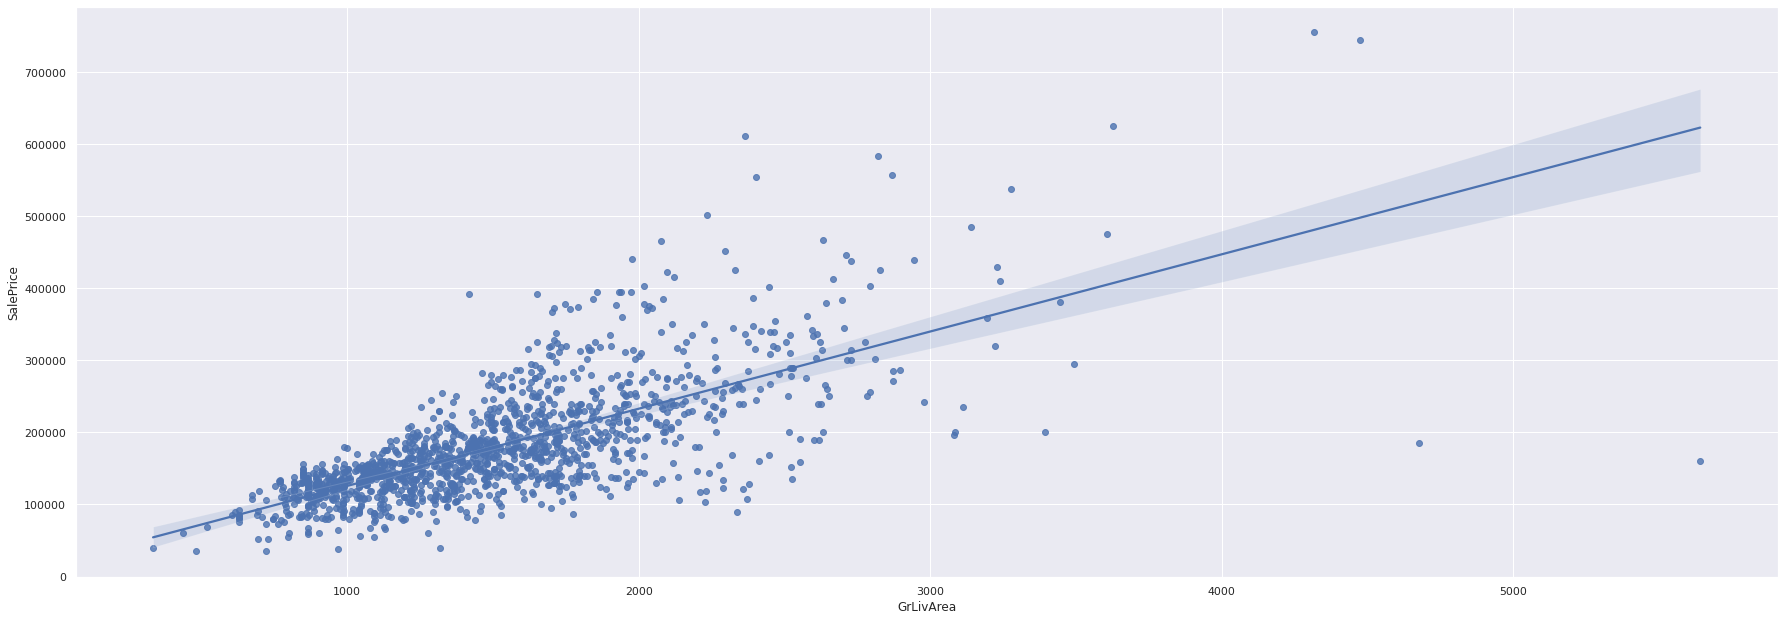

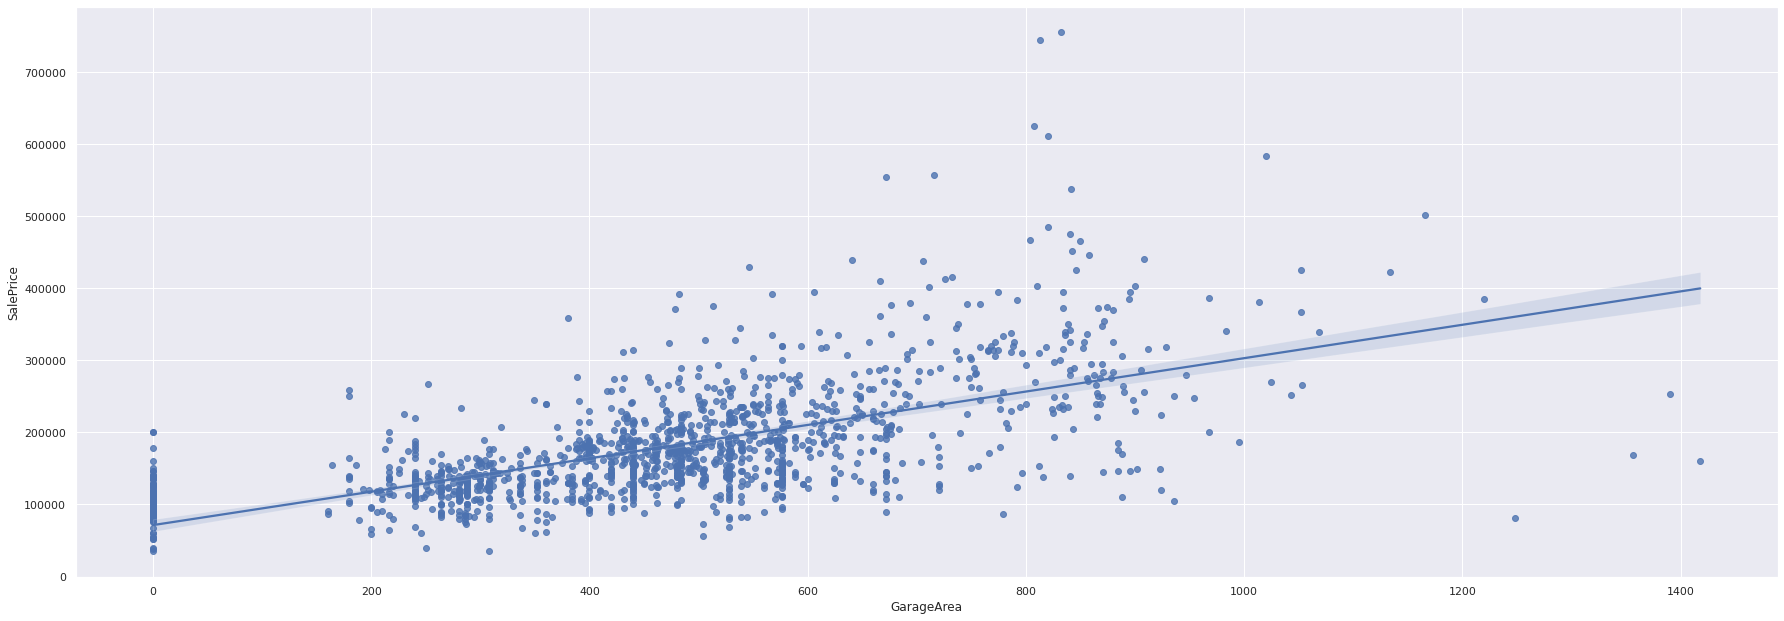

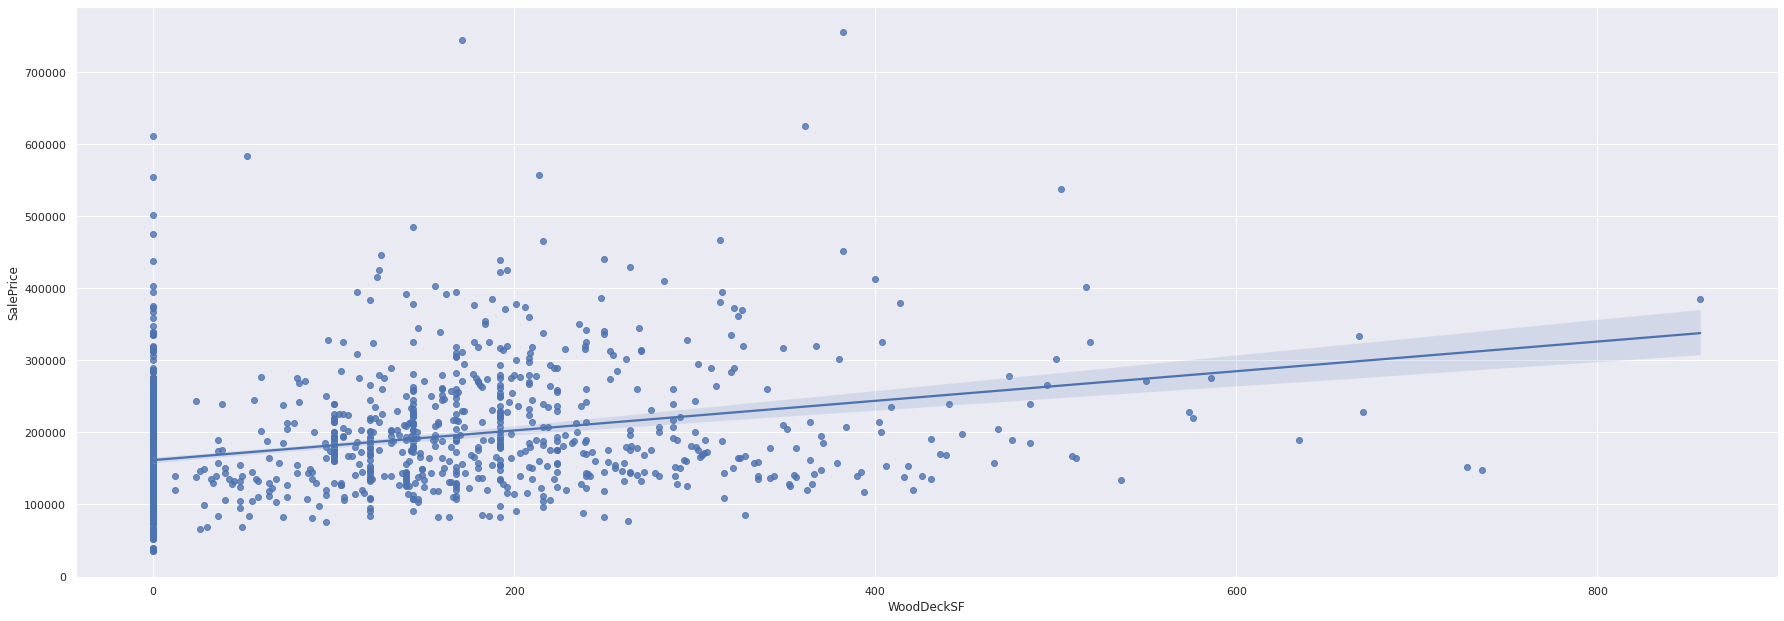

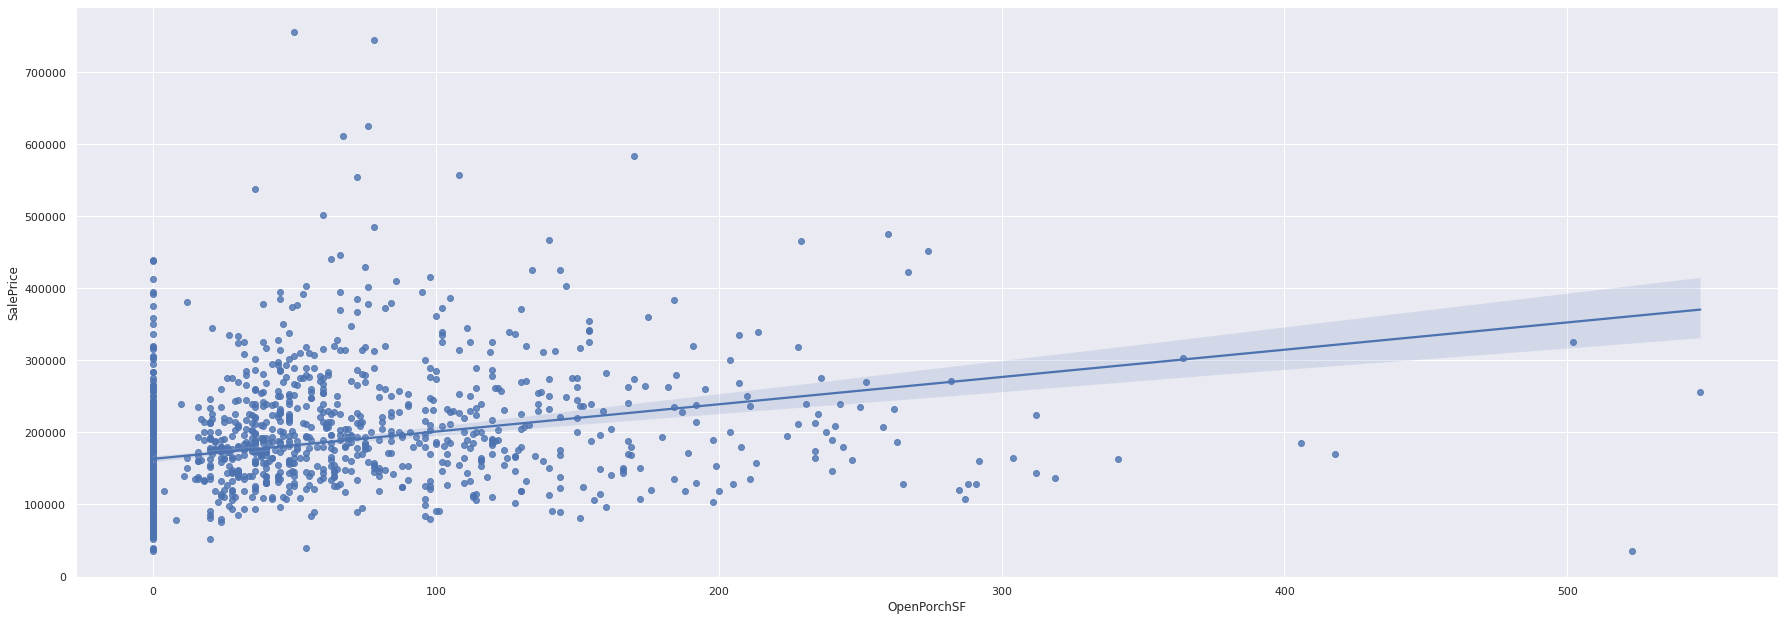

In [11]:
c_n_housing1 = X.columns.values.tolist()
unwanted_num=["SalePrice","GarageFinish","Condition2","Condition1","GarageQual","GarageCond","BsmtExposure",
              "Neighborhood","LandSlope","LotConfig","Utilities","LandContour","LotShape","Street","MSZoning",
              "SaleType","PavedDrive","GarageType","HouseStyle","Functional","BsmtFinType1","BsmtQual",
              "BsmtFinType2","Foundation","ExterCond","ExterQual","SaleCondition","HeatingQC","CentralAir",
              "Electrical","MasVnrType","Exterior2nd","Exterior1st","RoofMatl","RoofStyle","KitchenQual",
              "BsmtCond","BldgType","Heating","MSSubClass","OverallQual","OverallCond","BsmtFullBath",
              "BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","Fireplaces","GarageCars",
              "MoSold","YrSold","TotRmsAbvGrd","YearRemodAdd","YearBuilt","GarageYrBlt"]
c_n_housing1 = [ele for ele in c_n_housing1 if ele not in unwanted_num]
print(c_n_housing1)
corrp = []

for i in c_n_housing1: 
    putt = X[i].corr(X['SalePrice'])
    
    if putt >= 0.2 or putt <-0.2:
        corrp = corrp + [i]
    else:
        continue
    print("The correlation between ", i ," and SalesPrice is = ", putt)
print(corrp)

for i in corrp:  # Loop over all columns except 'Location'
    sns.set()
    fig, ax = plt.subplots()
    fig.set_size_inches(30.5, 10.5)
    sns.regplot(x=i, y='SalePrice', data=X)  # column is chosen here
   

## The Cells below contain code to store the names of the categorical data to use for finding the P-value of the categorical columns. One column, GarageYrBlt, has missing data and needs to be filled first to be used, after which I calculate the P-value and and choose those that have a P-value of less than 0.001.

In [12]:

pearson_housing = ["GarageFinish","Condition2","Condition1","GarageQual","GarageCond","BsmtExposure",
        "Neighborhood","LandSlope","LotConfig","Utilities","LandContour","LotShape","Street","MSZoning",
        "SaleType","PavedDrive","GarageType","HouseStyle","Functional","BsmtFinType1","BsmtQual",
        "BsmtFinType2","Foundation","ExterCond","ExterQual","SaleCondition","HeatingQC","CentralAir",
        "Electrical","MasVnrType","Exterior2nd","Exterior1st","RoofMatl","RoofStyle","KitchenQual",
        "BsmtCond","BldgType","Heating","MSSubClass","OverallQual","OverallCond","BsmtFullBath",
        "BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","Fireplaces","GarageCars",
        "MoSold","YrSold","TotRmsAbvGrd","YearRemodAdd","YearBuilt","GarageYrBlt"]
X2 = X[["SalePrice","GarageFinish","Condition2","Condition1","GarageQual","GarageCond","BsmtExposure",
        "Neighborhood","LandSlope","LotConfig","Utilities","LandContour","LotShape","Street","MSZoning",
        "SaleType","PavedDrive","GarageType","HouseStyle","Functional","BsmtFinType1","BsmtQual",
        "BsmtFinType2","Foundation","ExterCond","ExterQual","SaleCondition","HeatingQC","CentralAir",
        "Electrical","MasVnrType","Exterior2nd","Exterior1st","RoofMatl","RoofStyle","KitchenQual",
        "BsmtCond","BldgType","Heating","MSSubClass","OverallQual","OverallCond","BsmtFullBath",
        "BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","Fireplaces","GarageCars",
        "MoSold","YrSold","TotRmsAbvGrd","YearRemodAdd","YearBuilt","GarageYrBlt"]]
np.isnan(X2).any()

SalePrice        False
GarageFinish     False
Condition2       False
Condition1       False
GarageQual       False
GarageCond       False
BsmtExposure     False
Neighborhood     False
LandSlope        False
LotConfig        False
Utilities        False
LandContour      False
LotShape         False
Street           False
MSZoning         False
SaleType         False
PavedDrive       False
GarageType       False
HouseStyle       False
Functional       False
BsmtFinType1     False
BsmtQual         False
BsmtFinType2     False
Foundation       False
ExterCond        False
ExterQual        False
SaleCondition    False
HeatingQC        False
CentralAir       False
Electrical       False
MasVnrType       False
Exterior2nd      False
Exterior1st      False
RoofMatl         False
RoofStyle        False
KitchenQual      False
BsmtCond         False
BldgType         False
Heating          False
MSSubClass       False
OverallQual      False
OverallCond      False
BsmtFullBath     False
BsmtHalfBat

In [13]:
X2['GarageYrBlt'].fillna(int((X2['GarageYrBlt'].mean())), inplace=True)

/tmp/ipykernel_221/1232504465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['GarageYrBlt'].fillna(int((X2['GarageYrBlt'].mean())), inplace=True)


In [14]:
np.isnan(X2).any()

SalePrice        False
GarageFinish     False
Condition2       False
Condition1       False
GarageQual       False
GarageCond       False
BsmtExposure     False
Neighborhood     False
LandSlope        False
LotConfig        False
Utilities        False
LandContour      False
LotShape         False
Street           False
MSZoning         False
SaleType         False
PavedDrive       False
GarageType       False
HouseStyle       False
Functional       False
BsmtFinType1     False
BsmtQual         False
BsmtFinType2     False
Foundation       False
ExterCond        False
ExterQual        False
SaleCondition    False
HeatingQC        False
CentralAir       False
Electrical       False
MasVnrType       False
Exterior2nd      False
Exterior1st      False
RoofMatl         False
RoofStyle        False
KitchenQual      False
BsmtCond         False
BldgType         False
Heating          False
MSSubClass       False
OverallQual      False
OverallCond      False
BsmtFullBath     False
BsmtHalfBat

In [15]:
pcarl = []
for i in pearson_housing: 
   pearson_coef, p_value = stats.pearsonr(X2[i],X2['SalePrice'])
   if p_value <= 0.001:
        pcarl = pcarl + [i]
   else:
        continue
   print("The P-value of " ,i ," is P =", p_value) 

print(pcarl)

The P-value of  GarageFinish  is P = 3.448137521356474e-30
The P-value of  Condition1  is P = 0.0004879176783954465
The P-value of  GarageQual  is P = 3.1645107015068274e-24
The P-value of  GarageCond  is P = 6.788286194006305e-27
The P-value of  BsmtExposure  is P = 9.967788255316718e-14
The P-value of  Neighborhood  is P = 3.906732804258554e-16
The P-value of  LotShape  is P = 3.320711818202238e-23
The P-value of  MSZoning  is P = 1.4013002757716125e-10
The P-value of  PavedDrive  is P = 3.41833974822374e-19
The P-value of  GarageType  is P = 4.9380729885063305e-18
The P-value of  HouseStyle  is P = 4.06428284944684e-12
The P-value of  Functional  is P = 9.978134702390179e-06
The P-value of  BsmtQual  is P = 8.662182640654226e-70
The P-value of  BsmtFinType2  is P = 5.28440976280076e-07
The P-value of  Foundation  is P = 4.579865873936533e-52
The P-value of  ExterCond  is P = 6.995963215338824e-06
The P-value of  ExterQual  is P = 6.4244677574169624e-167
The P-value of  SaleCondition

## The Cell below contains code to add polynomial features to try and augment the data to mitigate the variance and decrease the Mean Absolute Percentage Error (M.A.P.E). I will be trying to remove the polynomial data and leave the rest of the data to reduce variance.
## Update: I have removed the columns of power raised values to reduce the variance and just augment the data while adding new relationships that can be translated directly to the test data.  

In [16]:
train[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
      '2ndFlrSF', 'GrLivArea', 'GarageArea', 
      'WoodDeckSF', 'OpenPorchSF']].isnull().mean()*100

LotArea        0.000000
MasVnrArea     0.547945
BsmtFinSF1     0.000000
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
2ndFlrSF       0.000000
GrLivArea      0.000000
GarageArea     0.000000
WoodDeckSF     0.000000
OpenPorchSF    0.000000
dtype: float64

In [17]:
train['MasVnrArea'].fillna(int((train['MasVnrArea'].mean())), inplace=True)
train[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
       '2ndFlrSF', 'GrLivArea', 'GarageArea', 
       'WoodDeckSF', 'OpenPorchSF']].isnull().mean()*100

LotArea        0.0
MasVnrArea     0.0
BsmtFinSF1     0.0
BsmtUnfSF      0.0
TotalBsmtSF    0.0
1stFlrSF       0.0
2ndFlrSF       0.0
GrLivArea      0.0
GarageArea     0.0
WoodDeckSF     0.0
OpenPorchSF    0.0
dtype: float64

In [18]:
pr = pf(degree = 5, interaction_only=True, include_bias=False)
train_poly = pr.fit_transform(train[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 
                                     'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                                     '2ndFlrSF', 'GrLivArea', 'GarageArea', 
                                     'WoodDeckSF', 'OpenPorchSF']])
porpus = pr.get_feature_names_out(['LotArea', 'MasVnrArea', 'BsmtFinSF1',
                          'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                          '2ndFlrSF', 'GrLivArea', 'GarageArea', 
                          'WoodDeckSF', 'OpenPorchSF']) 
train_poly = pd.DataFrame(train_poly,columns=porpus)

## The Cell below contains code to normalize the continous data columns in the regular columns and the interaction columns.

In [19]:
for column in train_poly.columns:
    train_poly[column] = train_poly[column]  / train_poly[column].abs().max()
display(train_poly)

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,...,TotalBsmtSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF,TotalBsmtSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,TotalBsmtSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,TotalBsmtSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea WoodDeckSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,1stFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,2ndFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF
0,0.033450,0.0,0.185330,0.071918,0.198691,0.268542,0.499274,0.406062,0.356841,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.047945,0.0,0.000000,0.323630,0.123732,0.161125,0.345278,0.260369,0.152327,0.066511,...,0.000000,0.000000,0.000000,0.0000,0.001277,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.211852,0.0,0.000000,0.388271,0.148445,0.278559,0.508959,0.417937,0.253879,0.567095,...,0.002387,0.021353,0.012971,0.0049,0.074260,0.004479,0.033040,0.02434,0.009195,0.032305
3,0.042473,0.0,0.000000,0.436644,0.166939,0.193521,0.493947,0.341723,0.310296,0.000000,...,0.003905,0.000000,0.000000,0.0000,0.000000,0.004527,0.000000,0.00000,0.000000,0.000000
4,0.044600,0.0,0.000000,0.113014,0.043208,0.163683,0.321550,0.253811,0.253879,0.315053,...,0.000000,0.000000,0.000000,0.0000,0.009301,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.024391,0.0,0.045889,0.181935,0.111948,0.199915,0.588378,0.417937,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1456,0.040791,0.0,0.110737,0.089041,0.136334,0.177536,0.000000,0.147643,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1457,0.007122,0.0,0.097980,0.032962,0.103110,0.134271,0.000000,0.111663,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1458,0.041813,0.0,0.000000,0.383562,0.146645,0.190963,0.433898,0.317618,0.000000,0.037340,...,0.000000,0.001012,0.000000,0.0000,0.000000,0.000000,0.001087,0.00000,0.000000,0.000000


In [20]:
train_poly.nunique()

LotArea                                                 1073
MasVnrArea                                               328
BsmtFinSF1                                               637
BsmtUnfSF                                                780
TotalBsmtSF                                              721
                                                        ... 
1stFlrSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF       373
1stFlrSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF       215
1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF      213
1stFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF     430
2ndFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF     213
Length: 1023, dtype: int64

## The Cell below contains code to incorporate the newly made columns into the existing train dataset. It also begins by combining the features gotten from the preprocessing actvities before.

In [21]:
train_clean = train[pcarl]
train_clean[porpus] = train_poly
train_clean.columns.sort_values()

/tmp/ipykernel_221/1775339535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean[porpus] = train_poly
/tmp/ipykernel_221/1775339535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean[porpus] = train_poly
/tmp/ipykernel_221/1775339535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

Index(['1stFlrSF', '1stFlrSF 2ndFlrSF', '1stFlrSF 2ndFlrSF GarageArea',
       '1stFlrSF 2ndFlrSF GarageArea OpenPorchSF',
       '1stFlrSF 2ndFlrSF GarageArea WoodDeckSF',
       '1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF',
       '1stFlrSF 2ndFlrSF GrLivArea', '1stFlrSF 2ndFlrSF GrLivArea GarageArea',
       '1stFlrSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF',
       '1stFlrSF 2ndFlrSF GrLivArea GarageArea WoodDeckSF',
       ...
       'TotalBsmtSF GrLivArea OpenPorchSF', 'TotalBsmtSF GrLivArea WoodDeckSF',
       'TotalBsmtSF GrLivArea WoodDeckSF OpenPorchSF',
       'TotalBsmtSF OpenPorchSF', 'TotalBsmtSF WoodDeckSF',
       'TotalBsmtSF WoodDeckSF OpenPorchSF', 'WoodDeckSF',
       'WoodDeckSF OpenPorchSF', 'YearBuilt', 'YearRemodAdd'],
      dtype='object', length=1063)

## The Cell below contains code to check the data types. 

In [22]:
train_clean.dtypes

GarageFinish                                             object
Condition1                                               object
GarageQual                                               object
GarageCond                                               object
BsmtExposure                                             object
                                                         ...   
1stFlrSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF      float64
1stFlrSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF      float64
1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF     float64
1stFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF    float64
2ndFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF    float64
Length: 1063, dtype: object

## The Cell below contains code to add polynomial features to match the test set with the training set. But first I use the first three code cells to take care of Nan values in the test dataset. 

In [23]:
test[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
      '2ndFlrSF', 'GrLivArea', 'GarageArea', 
      'WoodDeckSF', 'OpenPorchSF']].isnull().mean()*100

LotArea        0.000000
MasVnrArea     1.028101
BsmtFinSF1     0.068540
BsmtUnfSF      0.068540
TotalBsmtSF    0.068540
1stFlrSF       0.000000
2ndFlrSF       0.000000
GrLivArea      0.000000
GarageArea     0.068540
WoodDeckSF     0.000000
OpenPorchSF    0.000000
dtype: float64

In [24]:
test['TotalBsmtSF'].fillna(int((test['TotalBsmtSF'].mean())), inplace=True)
test['GarageArea'].fillna(int((test['GarageArea'].mean())), inplace=True)
test['MasVnrArea'].fillna(int((test['MasVnrArea'].mean())), inplace=True)
test['BsmtFinSF1'].fillna(int((test['BsmtFinSF1'].mean())), inplace=True)
test['BsmtUnfSF'].fillna(int((test['BsmtUnfSF'].mean())), inplace=True)
test[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
      '2ndFlrSF', 'GrLivArea', 'GarageArea', 
      'WoodDeckSF', 'OpenPorchSF']].isnull().mean()*100

LotArea        0.0
MasVnrArea     0.0
BsmtFinSF1     0.0
BsmtUnfSF      0.0
TotalBsmtSF    0.0
1stFlrSF       0.0
2ndFlrSF       0.0
GrLivArea      0.0
GarageArea     0.0
WoodDeckSF     0.0
OpenPorchSF    0.0
dtype: float64

In [25]:
pr = pf(degree = 5 , interaction_only=True, include_bias=False)
test_poly = pr.fit_transform(test[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 
                                   'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                                   '2ndFlrSF', 'GrLivArea', 'GarageArea', 
                                   'WoodDeckSF', 'OpenPorchSF']])
porpusi = pr.get_feature_names_out(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 
                                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                                  '2ndFlrSF', 'GrLivArea', 'GarageArea', 
                                  'WoodDeckSF', 'OpenPorchSF'])
test_poly = pd.DataFrame(test_poly,columns=porpusi)

In [26]:
for column in test_poly.columns:
    test_poly[column] = test_poly[column]  / test_poly[column].abs().max()
display(test_poly)

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,...,TotalBsmtSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF,TotalBsmtSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,TotalBsmtSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,TotalBsmtSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea WoodDeckSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,1stFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,2ndFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF
0,0.205336,0.000000,0.116708,0.126168,0.173111,0.175859,0.000000,0.175859,0.490591,0.098315,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.252067,0.083721,0.230175,0.189720,0.260844,0.260844,0.000000,0.260844,0.209677,0.275983,...,0.000000,0.000000,0.000000,0.000985,0.000000,0.000000,0.000000,0.000000,0.000985,0.000000
2,0.244346,0.000000,0.197257,0.064019,0.182139,0.182139,0.376477,0.319725,0.323925,0.148876,...,0.014426,0.010741,0.011599,0.000663,0.012242,0.009695,0.009630,0.010399,0.000663,0.010082
3,0.176290,0.015504,0.150125,0.151402,0.181747,0.181747,0.364125,0.314818,0.315860,0.252809,...,0.014154,0.018353,0.019626,0.001143,0.019264,0.009512,0.016454,0.017596,0.001143,0.016833
4,0.088428,0.000000,0.065586,0.475234,0.251227,0.251227,0.000000,0.251227,0.340054,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.034205,0.000000,0.000000,0.255140,0.107164,0.107164,0.293233,0.214328,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1455,0.033463,0.000000,0.062843,0.137383,0.107164,0.107164,0.293233,0.214328,0.192204,0.000000,...,0.001856,0.000000,0.000000,0.000000,0.000000,0.001247,0.000000,0.000000,0.000000,0.000000
1456,0.353357,0.000000,0.305237,0.000000,0.240236,0.240236,0.000000,0.240236,0.387097,0.332865,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1457,0.184470,0.000000,0.084040,0.268692,0.178999,0.190383,0.000000,0.190383,0.000000,0.056180,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## The Cell below contains code to incorporate the newly made columns into the existing test dataset. It also begins by combining the features gotten from the preprocessing actvities before to match with the train dataset.

In [27]:
test_clean = test[pcarl]
test_clean[porpusi] = test_poly
test_clean.columns.sort_values()

/tmp/ipykernel_221/601798366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clean[porpusi] = test_poly
/tmp/ipykernel_221/601798366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clean[porpusi] = test_poly
/tmp/ipykernel_221/601798366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

Index(['1stFlrSF', '1stFlrSF 2ndFlrSF', '1stFlrSF 2ndFlrSF GarageArea',
       '1stFlrSF 2ndFlrSF GarageArea OpenPorchSF',
       '1stFlrSF 2ndFlrSF GarageArea WoodDeckSF',
       '1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF',
       '1stFlrSF 2ndFlrSF GrLivArea', '1stFlrSF 2ndFlrSF GrLivArea GarageArea',
       '1stFlrSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF',
       '1stFlrSF 2ndFlrSF GrLivArea GarageArea WoodDeckSF',
       ...
       'TotalBsmtSF GrLivArea OpenPorchSF', 'TotalBsmtSF GrLivArea WoodDeckSF',
       'TotalBsmtSF GrLivArea WoodDeckSF OpenPorchSF',
       'TotalBsmtSF OpenPorchSF', 'TotalBsmtSF WoodDeckSF',
       'TotalBsmtSF WoodDeckSF OpenPorchSF', 'WoodDeckSF',
       'WoodDeckSF OpenPorchSF', 'YearBuilt', 'YearRemodAdd'],
      dtype='object', length=1063)

In [28]:
train_clean

,GarageFinish,Condition1,GarageQual,GarageCond,BsmtExposure,Neighborhood,LotShape,MSZoning,PavedDrive,GarageType,...,TotalBsmtSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF,TotalBsmtSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,TotalBsmtSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,TotalBsmtSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea WoodDeckSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,1stFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,2ndFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF
0,Unf,Norm,TA,TA,Mn,OldTown,Reg,C (all),Y,Detchd,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,Unf,Norm,TA,TA,No,IDOTRR,Reg,RM,Y,Detchd,...,0.000000,0.000000,0.000000,0.0000,0.001277,0.000000,0.000000,0.00000,0.000000,0.000000
2,Unf,Norm,Fa,TA,No,ClearCr,IR2,RL,Y,Detchd,...,0.002387,0.021353,0.012971,0.0049,0.074260,0.004479,0.033040,0.02434,0.009195,0.032305
3,Unf,Norm,Po,Po,No,OldTown,Reg,RM,Y,Detchd,...,0.003905,0.000000,0.000000,0.0000,0.000000,0.004527,0.000000,0.00000,0.000000,0.000000
4,Unf,Norm,TA,Gd,No,OldTown,Reg,RM,Y,Detchd,...,0.000000,0.000000,0.000000,0.0000,0.009301,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,Norm,NaN,NaN,No,OldTown,Reg,RM,Y,NaN,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1456,NaN,Norm,NaN,NaN,No,Mitchel,IR1,RL,Y,NaN,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1457,NaN,Norm,NaN,NaN,Av,MeadowV,Reg,RM,Y,NaN,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1458,NaN,Norm,NaN,NaN,No,NAmes,Reg,RL,Y,NaN,...,0.000000,0.001012,0.000000,0.0000,0.000000,0.000000,0.001087,0.00000,0.000000,0.000000


## The Cell below contains code to Divide the train dataset into x and y. Y contains the expected output and x contains the features used to get it.

In [29]:
carlos = pd.DataFrame(train[['SalePrice']],columns=['SalePrice'])
XX = train_clean
XX = pd.concat([XX, carlos], axis=1, join='inner')
XX

,GarageFinish,Condition1,GarageQual,GarageCond,BsmtExposure,Neighborhood,LotShape,MSZoning,PavedDrive,GarageType,...,TotalBsmtSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,TotalBsmtSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,TotalBsmtSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea WoodDeckSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,1stFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,2ndFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,SalePrice
0,Unf,Norm,TA,TA,Mn,OldTown,Reg,C (all),Y,Detchd,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,133900
1,Unf,Norm,TA,TA,No,IDOTRR,Reg,RM,Y,Detchd,...,0.000000,0.000000,0.0000,0.001277,0.000000,0.000000,0.00000,0.000000,0.000000,135000
2,Unf,Norm,Fa,TA,No,ClearCr,IR2,RL,Y,Detchd,...,0.021353,0.012971,0.0049,0.074260,0.004479,0.033040,0.02434,0.009195,0.032305,240000
3,Unf,Norm,Po,Po,No,OldTown,Reg,RM,Y,Detchd,...,0.000000,0.000000,0.0000,0.000000,0.004527,0.000000,0.00000,0.000000,0.000000,137000
4,Unf,Norm,TA,Gd,No,OldTown,Reg,RM,Y,Detchd,...,0.000000,0.000000,0.0000,0.009301,0.000000,0.000000,0.00000,0.000000,0.000000,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,Norm,NaN,NaN,No,OldTown,Reg,RM,Y,NaN,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,122000
1456,NaN,Norm,NaN,NaN,No,Mitchel,IR1,RL,Y,NaN,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,112000
1457,NaN,Norm,NaN,NaN,Av,MeadowV,Reg,RM,Y,NaN,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,92000
1458,NaN,Norm,NaN,NaN,No,NAmes,Reg,RL,Y,NaN,...,0.001012,0.000000,0.0000,0.000000,0.000000,0.001087,0.00000,0.000000,0.000000,136000


## The Cell below contains code to fill all the missisng features in the column GarageYrBlt.

In [30]:
XX.fillna(1, inplace=True)
XX["GarageYrBlt"] = XX["GarageYrBlt"].astype('int64')
XX["GarageYrBlt"]

0       1900
1       1906
2       1908
3       1910
4       1910
        ... 
1455       1
1456       1
1457       1
1458       1
1459       1
Name: GarageYrBlt, Length: 1460, dtype: int64

In [31]:
train = XX

In [32]:
train = train.astype({'GarageFinish' : 'category','Condition1' : 'category','GarageQual' : 'category', 
                      'GarageCond' : 'category','BsmtExposure' : 'category','Neighborhood' : 'category', 
                      'LotShape' : 'category','MSZoning' : 'category','PavedDrive' : 'category', 
                      'GarageType' : 'category','HouseStyle' : 'category','Functional' : 'category', 
                      'BsmtQual' : 'category','BsmtFinType2' : 'category','Foundation' : 'category', 
                      'ExterCond' : 'category','ExterQual' : 'category','SaleCondition' : 'category', 
                      'HeatingQC' : 'category','CentralAir' : 'category','Electrical' : 'category', 
                      'Exterior2nd' : 'category','Exterior1st' : 'category','RoofMatl' : 'category', 
                      'RoofStyle' : 'category','KitchenQual' : 'category','BsmtCond' : 'category', 
                      'Heating' : 'category','OverallQual' : 'category','BsmtFullBath' : 'category', 
                      'FullBath' : 'category','HalfBath' : 'category','BedroomAbvGr' : 'category',
                      'KitchenAbvGr' : 'category','Fireplaces' : 'category','GarageCars' : 'category',
                      'TotRmsAbvGrd' : 'category', 'YearRemodAdd' : 'category', 'YearBuilt' : 'category', 
                      'GarageYrBlt' : 'category'})
cat_columns = train.select_dtypes(['category']).columns
train[cat_columns] = train[cat_columns].apply(lambda x: x.cat.codes)
train.dtypes.sort_values()

GarageFinish                                   int8
Exterior1st                                    int8
RoofMatl                                       int8
RoofStyle                                      int8
KitchenQual                                    int8
                                             ...   
LotArea GrLivArea GarageArea WoodDeckSF     float64
LotArea GrLivArea GarageArea OpenPorchSF    float64
LotArea GrLivArea WoodDeckSF OpenPorchSF    float64
LotArea 1stFlrSF GrLivArea WoodDeckSF       float64
BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF     float64
Length: 1064, dtype: object

In [33]:
train_dataset = train.sample(frac=0.7, random_state=0)
test_dataset = train.drop(train_dataset.index)


In [34]:
#sns.pairplot(train_dataset, diag_kind='kde')

In [35]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('SalePrice')
test_labels = test_features.pop('SalePrice')

train_features

,GarageFinish,Condition1,GarageQual,GarageCond,BsmtExposure,Neighborhood,LotShape,MSZoning,PavedDrive,GarageType,...,TotalBsmtSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF,TotalBsmtSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,TotalBsmtSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,TotalBsmtSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea WoodDeckSF,1stFlrSF 2ndFlrSF GrLivArea GarageArea OpenPorchSF,1stFlrSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,1stFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,2ndFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF
529,3,2,5,5,1,4,3,3,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
491,2,2,5,5,1,11,0,3,2,2,...,0.009118,0.034769,0.037257,0.015432,0.038952,0.017690,0.055622,0.07228,0.029939,0.089594
459,3,2,5,5,3,19,0,3,2,2,...,0.000000,0.000000,0.000000,0.003629,0.000000,0.000000,0.000000,0.00000,0.004726,0.000000
279,3,2,5,5,4,19,3,3,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
655,3,2,5,5,4,7,3,3,2,6,...,0.001759,0.000000,0.000000,0.000000,0.000000,0.002557,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,3,2,5,5,4,9,3,4,1,6,...,0.004147,0.000000,0.000000,0.000000,0.000000,0.005401,0.000000,0.00000,0.000000,0.000000
375,3,2,5,5,2,11,3,3,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
975,2,2,5,5,4,5,0,3,2,2,...,0.005414,0.000000,0.000000,0.000000,0.000000,0.007124,0.000000,0.00000,0.000000,0.000000
185,3,2,5,5,4,12,3,3,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [36]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
GarageFinish,2.060665,0.940043
Condition1,2.020548,0.863090
GarageQual,4.561644,1.306810
GarageCond,4.613503,1.261318
BsmtExposure,3.225049,1.217019
...,...,...
1stFlrSF 2ndFlrSF GrLivArea WoodDeckSF OpenPorchSF,0.005184,0.033972
1stFlrSF 2ndFlrSF GarageArea WoodDeckSF OpenPorchSF,0.006562,0.040113
1stFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,0.004531,0.033324
2ndFlrSF GrLivArea GarageArea WoodDeckSF OpenPorchSF,0.008369,0.043900


In [37]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [38]:
train_features = np.asarray(train_features).astype('float32')

In [39]:
normalizer.adapt(np.array(train_features))

2022-09-04 12:00:59.089363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-04 12:00:59.089399: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-04 12:00:59.089421: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-09-04 12:00:59.094375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
print(normalizer.mean.numpy())

[[2.061 2.021 4.562 ... 0.007 0.005 0.008]]


In [41]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[3. 2. 5. ... 0. 0. 0.]]

Normalized: [[ 1.   -0.02  0.34 ... -0.16 -0.14 -0.19]]


In [48]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [49]:
def build_and_compile_model(norm):
  model = keras.Sequential([norm,layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(1)])

  model.compile(loss='mean_absolute_percentage_error',optimizer=tf.keras.optimizers.Adam(0.0001))
  return model

In [50]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1063)             2127      
 n)                                                              
                                                                 
 dense_11 (Dense)            (None, 2048)              2179072   
                                                                 
 dense_12 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_13 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_14 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_15 (Dense)            (None, 2048)              4196352   
                                                      

In [51]:
%%time
history = dnn_model.fit(train_features, train_labels, validation_split=0.2, verbose=1, epochs=10)

Epoch 1/10
26/26 [==============================] - 8s 290ms/step - loss: 99.9583 - val_loss: 99.1610
Epoch 2/10
26/26 [==============================] - 7s 276ms/step - loss: 62.8513 - val_loss: 40.7562
Epoch 3/10
26/26 [==============================] - 7s 273ms/step - loss: 31.5254 - val_loss: 19.6384
Epoch 4/10
26/26 [==============================] - 7s 274ms/step - loss: 15.7039 - val_loss: 15.7793
Epoch 5/10
26/26 [==============================] - 7s 275ms/step - loss: 12.8589 - val_loss: 15.2810
Epoch 6/10
26/26 [==============================] - 7s 274ms/step - loss: 12.0421 - val_loss: 14.3908
Epoch 7/10
26/26 [==============================] - 7s 275ms/step - loss: 11.5968 - val_loss: 13.3786
Epoch 8/10
26/26 [==============================] - 7s 274ms/step - loss: 10.8050 - val_loss: 12.9481
Epoch 9/10
26/26 [==============================] - 7s 274ms/step - loss: 10.2907 - val_loss: 12.3744
Epoch 10/10
26/26 [==============================] - 7s 277ms/step - loss: 9.6645 

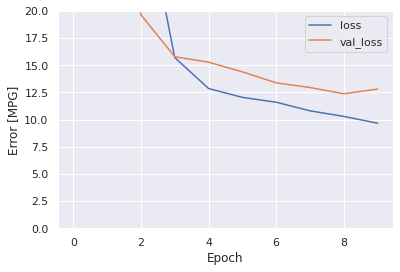

In [52]:
plot_loss(history)

In [54]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=1)

14/14 [==============================] - 1s 50ms/step - loss: 13.9417


In [55]:
pd.DataFrame(test_results, index=['Mean absolute percentage error [MPG]']).T

,Mean absolute percentage error [MPG]
dnn_model,13.941655


14/14 [==============================] - 1s 56ms/step


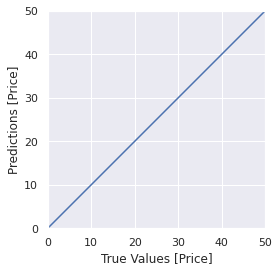

In [56]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

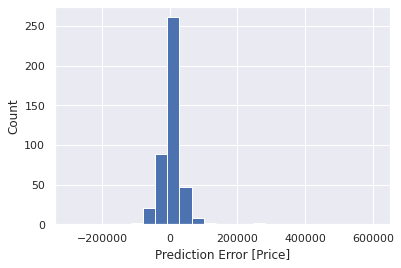

In [57]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Price]')
_ = plt.ylabel('Count')

In [58]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [59]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(test_features, test_labels, verbose=1)

14/14 [==============================] - 1s 62ms/step - loss: 13.9417


In [60]:
pd.DataFrame(test_results, index=['Mean absolute error [Price]']).T

,Mean absolute error [Price]
dnn_model,13.941655
reloaded,13.941655
